<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/03_keras/part03_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망으로 이미지 분류

In [14]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [15]:
# load_data()로 데이터셋을 로드 합니다.
# x_train, y_train 훈련 셋의 입력 데이터(x)와 출력 데이터(y)를 나타낸다.
# x_test와 y_test는 검증 셋의 입력과 출력 데이터를 저장한다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape) #(데이터셋 크기, 이미지세로, 이미지가로 픽셀 크기)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


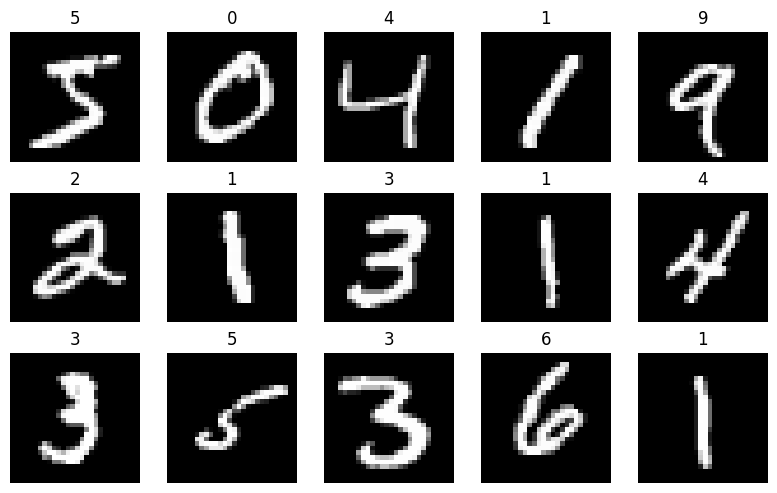

In [17]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [18]:
## 데이터 전처리
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [19]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [20]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [21]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [22]:
# 정규화는 데이터의 전체 범위를 0~1 사이의 값을 가지도록 한다.
# 정규화하는 이유: 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문이다.

## Flattern 레이어

In [23]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


-1을 사용하면 해당 차원의 크기를 자동으로 계산하여 남은 차원을 유지한 채로 데이터를 재구성합니다. x_train.reshape(60000, -1)의 경우에는 1차원으로 변경하되, 남은 차원의 크기는 자동으로 계산됩니다.

In [24]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 활성화 함수

In [25]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [26]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## 입력과 출력

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [30]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

In [31]:
# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 손실함수

출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우

In [32]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

출력 노드가 2개 이상, softmax 활성화 함수를 적용한 경우

In [33]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저
클래스 인스턴스로 지정 / 문자열 지정
1. 문자열 지정 : 클래스 이름 소문자로 표기
2. 클래스 인스턴스: 학습률(learning rate: lr)과 같은 하이퍼파라미터를 직접 설정

In [35]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## 3-8 평가지표

In [36]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [37]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9 훈련

In [38]:
# 훈련
model.fit(x_train, y_train,
          # 검증셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2337 - accuracy: 0.9295 - val_loss: 0.1189 - val_accuracy: 0.9624
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0929 - accuracy: 0.9720 - val_loss: 0.0879 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0902 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.1029 - val_accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0924 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0902 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0775 - val_ac

In [39]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)
# evaluate(): 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1117 - accuracy: 0.9779
검증셋 정확도: 0.9779000282287598


## 3-11 예측

In [42]:
# 예측
predictions = model.predict(x_test)
# 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장.

313/313 [==============================] - 1s 2ms/step


In [41]:
# 예측 결과 출력
predictions[0]

array([1.1736474e-10, 2.2076533e-07, 5.8116898e-09, 2.6646518e-08,
       2.8976177e-10, 4.1894153e-12, 1.9554123e-14, 9.9999970e-01,
       2.8473615e-10, 2.7194107e-08], dtype=float32)

In [43]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


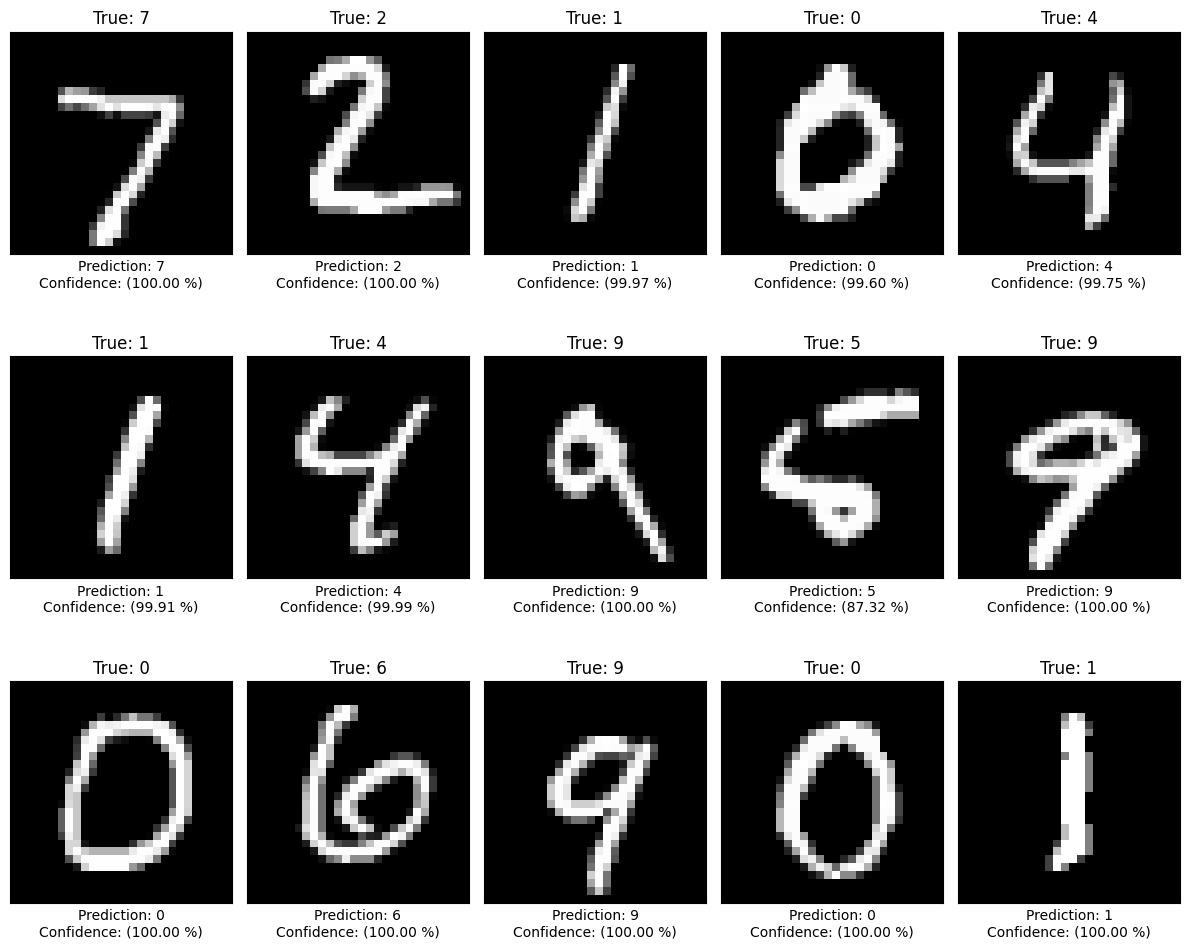

In [44]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

# 모델 세부 설정

In [45]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


In [46]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

# 초기화

In [3]:
import tensorflow as tf
# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [4]:
# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

# 규제

In [5]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [6]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


# 드랍아웃

## 모델이 훈련할 때는 드롭 아웃이 적용되어 노드 중 일부만 훈련하게 되지만, <br> 예측 시점에서는 모든 노드들이 활용된다.

In [7]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## 배치 정규화
각 층에서 활성화함수를 통과하기 전 미니 배치의 스케일을 정규화한다. -> 안정적인 훈련, 성능 향상

In [8]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

## 활성화 함수
활성화 함수 적용 시, 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있다.

In [10]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [11]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [16]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4322 - accuracy: 0.8067 - val_loss: 0.5133 - val_accuracy: 0.8655
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3494 - accuracy: 0.9077 - val_loss: 0.3000 - val_accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2520 - accuracy: 0.9324 - val_loss: 0.2577 - val_accuracy: 0.9362
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2086 - accuracy: 0.9417 - val_loss: 0.2190 - val_accuracy: 0.9419
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1793 - accuracy: 0.9503 - val_loss: 0.1919 - val_accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1552 - accuracy: 0.9568 - val_loss: 0.1659 - val_accuracy: 0.9547
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1377 - accuracy: 0.9614 - val_loss: 0.1631 - val_accuracy:

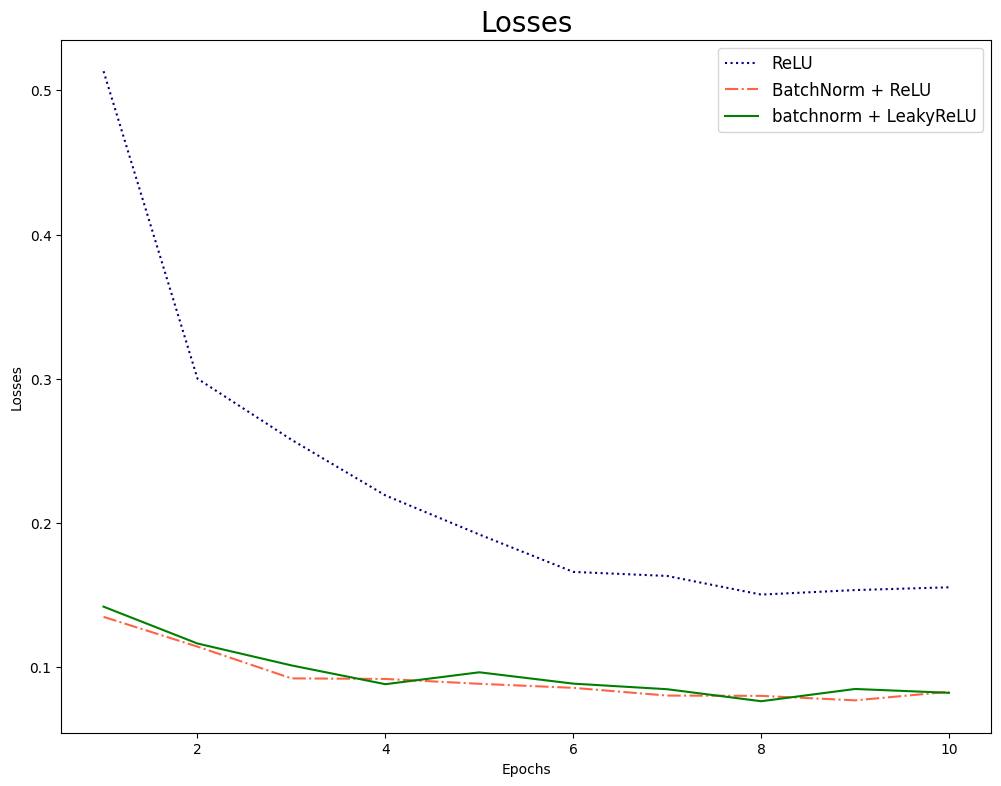

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

## 콜백

In [18]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

## 모델 체크포인트

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

In [20]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt', # 체크포인트의 저장 경로 지정
                                                save_weights_only=True,  # 가중치만 저장할지 여부 설정
                                                save_best_only=True,  #monitor 기준으로 가장 높은 epoch만 저장할지 아니면 매 epoch별 저장할지 여부를 설정
                                                monitor='val_loss', #monitor: 저장 시 기준이 되는 지표 설정. val_loss로 지정 시 검증 손실이 갖아 낮은 epoch의 가중치를 저장
                                                verbose=1) #1로 설정 시 매epoch별 저장 여부를 알려주는 로그 메시지 출력

In [ ]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[checkpoint]
          )

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2243 - accuracy: 0.9342
Epoch 1: val_loss improved from inf to 0.13082, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2243 - accuracy: 0.9342 - val_loss: 0.1308 - val_accuracy: 0.9592
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0921 - accuracy: 0.9717
Epoch 2: val_loss improved from 0.13082 to 0.09790, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.0979 - val_accuracy: 0.9704
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9792
Epoch 3: val_loss improved from 0.09790 to 0.07816, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0665 - accuracy: 0.9791 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 4/10
1866/1875 [======================